# EDA MNIST
We will create a MNIST Dataset in order to try it.

In [5]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0,'../')
from src.classification import ClassificationMNIST
mnist_path = "/mnt/c/BUSDATA/Datasets/MNIST/flat/"

cls_dataset = ClassificationMNIST.from_folder(mnist_path)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


100%|██████████| 10/10 [01:26<00:00,  8.67s/it, cls_name=9 - nine]


In [ ]:
cls_dataset.save("/mnt/c/BUSDATA/Datasets/MNIST/flat/mnist.json")

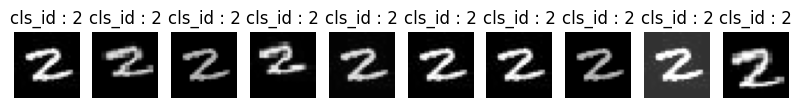

In [4]:
import matplotlib.pyplot as plt

n_img = 10
fig,ax = plt.subplots(1,n_img,figsize=(10,1))

for i in range(n_img):
    img,target,name = cls_dataset[210]
    img_np = (img.numpy().transpose(1,2,0)+1)*127.5
    ax[i].imshow(img_np)
    ax[i].set_title(f'cls_id : {target}')
    ax[i].axis('off')
plt.show()

We'll create a dataloader with our dataset.

In [22]:
from torch.utils.data import DataLoader
import os
train_loader = DataLoader(cls_dataset,batch_size=10,shuffle=True,num_workers=os.cpu_count())

In [23]:
batch = next(iter(train_loader))

In [24]:
print(f'len(batch) : {len(batch)}')
print(f'batch[0].shape : {batch[0].shape}')

len(batch) : 3
batch[0].shape : torch.Size([10, 3, 28, 28])


In [28]:
batch[1]

tensor([6, 4, 4, 5, 1, 5, 2, 6, 2, 8])

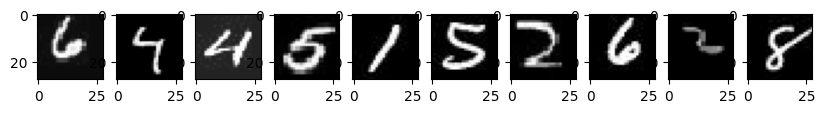

In [26]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,10,figsize=(10,1))
for i,img_torch in enumerate(batch[0]):
    np_img = (127.5*(img_torch.permute(1,2,0)+1)).numpy()
    ax[i].imshow(np_img)
plt.show()
